In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from math import exp,log

warnings.filterwarnings( "ignore" )
np.random.seed(1)

In [2]:
myData = pd.read_csv("dataset_NN.csv")

X = myData.iloc[:,:-1]
y = myData.iloc[:,-1:]

myData = (X - X.min()) / (X.max() - X.min())
myData["class"] = y


In [3]:
train_data = myData.sample(frac = 0.7).reset_index(drop = True)
test_data = myData.drop(train_data.index).reset_index(drop = True)
train_data = train_data.reset_index(drop = True)

In [4]:
num_of_hidden_nodes = 14
num_of_output_nodes = 10
num_of_attributes = train_data.shape[1] - 1
rows = train_data.shape[0]

wh = np.random.randn(num_of_attributes, num_of_hidden_nodes)
bh = np.random.randn(1, num_of_hidden_nodes)
wo = np.random.randn(num_of_hidden_nodes, num_of_output_nodes)
bo = np.random.randn(1, num_of_output_nodes)

In [5]:
learning_rate = 0.0001
loss_list = []
x_values = []
accuracy = []

In [6]:
def ReLU(x):
    return np.maximum(x, 0)

In [7]:
def der_ReLU(x):
    x[x <= 0] = 0 
    x[x > 0] = 1
    return x

In [8]:
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis = 1, keepdims = True)

In [9]:
xi = np.array(train_data.iloc[:,:-1].values)
value = train_data.iloc[:,-1:].values
one_hot_labels = np.zeros((rows,num_of_output_nodes))
for i in range(rows):
    one_hot_labels[i, value[i][0]-1] = 1

In [10]:
for itr in range(50000):
    zh = np.dot(xi,wh) + bh
    ah = ReLU(zh)
    zo = np.dot(ah,wo) + bo 
    ao = softmax(zo)
    
    dcost_dzo = ao - one_hot_labels
    dcost_dwo = np.dot(ah.T,dcost_dzo)
    
    wo -= learning_rate * dcost_dwo 
    bo -= learning_rate * dcost_dzo.sum(axis = 0)
    
    dcost_dah = np.dot(dcost_dzo,wo.T)
    dcost_dzh = dcost_dah * der_ReLU(zh)
    dcost_dwh = np.dot(xi.T,dcost_dzh)
    
    wh -= learning_rate * dcost_dwh
    bh -= learning_rate * dcost_dzh.sum(axis = 0)

    if itr % 1000 == 0:
        loss = np.sum(-one_hot_labels * np.log(ao))
        loss /= rows
        print('Loss function value: ', loss)
        loss_list.append(loss)
        x_values.append(itr)
        count = 0
        for k in range(rows):
            if np.argmax(one_hot_labels[k]) == np.argmax(ao[k]):
                count += 1
        accuracy.append((count*100) / rows)
        print('Training Accuracy:', (count*100) / rows)

Loss function value:  3.03564556163348
Training Accuracy: 19.0
Loss function value:  0.7372562983384423
Training Accuracy: 71.78571428571429
Loss function value:  0.6779935083982737
Training Accuracy: 73.21428571428571
Loss function value:  0.6417717956637061
Training Accuracy: 75.14285714285714
Loss function value:  0.6140980930542157
Training Accuracy: 76.42857142857143
Loss function value:  0.5949496024199823
Training Accuracy: 76.57142857142857
Loss function value:  0.5823758089482542
Training Accuracy: 76.57142857142857
Loss function value:  0.574263581458876
Training Accuracy: 76.42857142857143
Loss function value:  0.5686461962793976
Training Accuracy: 76.21428571428571
Loss function value:  0.5645306869211771
Training Accuracy: 76.21428571428571
Loss function value:  0.5613559026902646
Training Accuracy: 76.5
Loss function value:  0.5587777794413867
Training Accuracy: 76.5
Loss function value:  0.5566434747139626
Training Accuracy: 76.42857142857143
Loss function value:  0.5548

Accuracy on Testing data:  82.0


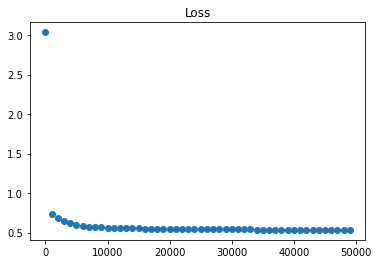

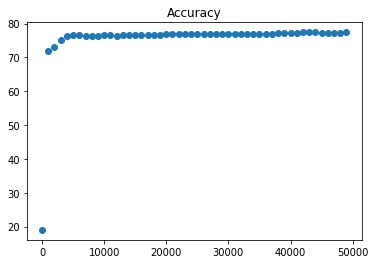

In [11]:
rows = test_data.shape[0]

xi = np.array(test_data.iloc[:,:-1].values)
value = test_data.iloc[:,-1:].values
one_hot_labels = np.zeros((rows,num_of_output_nodes))
for i in range(rows):
    one_hot_labels[i, value[i][0]-1] = 1
    
zh = np.dot(xi,wh) + bh
ah = ReLU(zh)
zo = np.dot(ah,wo) + bo
ao = softmax(zo)
count = 0

#Accuracy on testing data
for k in range(rows): 
    if np.argmax(one_hot_labels[k]) == np.argmax(ao[k]):
        count += 1
print('Accuracy on Testing data: ', (count*100) / rows)


plt.scatter(x_values,loss_list)
plt.title("Loss")
plt.show()
plt.scatter(x_values,accuracy)
plt.title("Accuracy")
plt.show()